MAE: 1124.1448539111254
RMSE: 1633.2427709687659
R2 Score: 0.9894590297359334


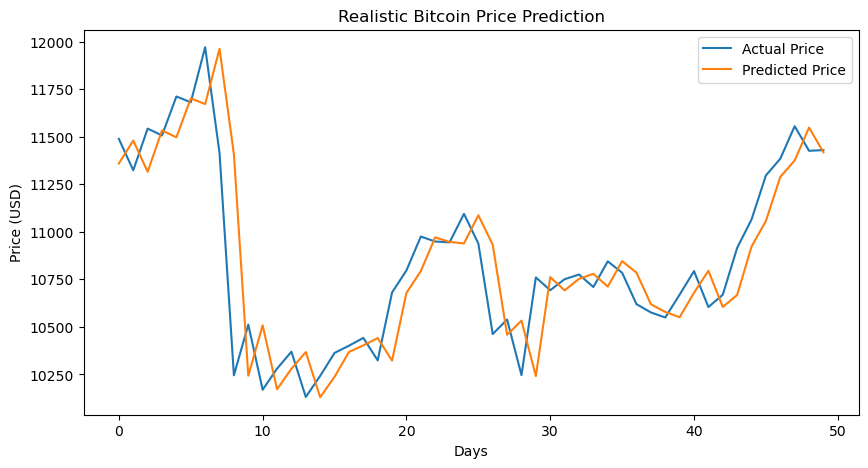

Predicted Next Day Bitcoin Price: 40043.64686317313


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
df = pd.read_csv("bitcoin.csv")
df['Date'] = pd.to_datetime(df['Date'])
df['Prev_Close'] = df['Close'].shift(1)
df['Prev_Volume'] = df['Volume'].shift(1)

df.dropna(inplace=True)
X = df[['Prev_Close', 'Prev_Volume']]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:50], label="Actual Price")
plt.plot(y_pred[:50], label="Predicted Price")
plt.legend()
plt.title("Realistic Bitcoin Price Prediction")
plt.xlabel("Days")
plt.ylabel("Price (USD)")
plt.show()
latest_close = df.iloc[-1]['Close']
latest_volume = df.iloc[-1]['Volume']

future_input = pd.DataFrame(
    [[latest_close, latest_volume]],
    columns=['Prev_Close', 'Prev_Volume']
)

future_price = model.predict(future_input)
print("Predicted Next Day Bitcoin Price:", future_price[0])
